Accuracy: 0.7886178861788617


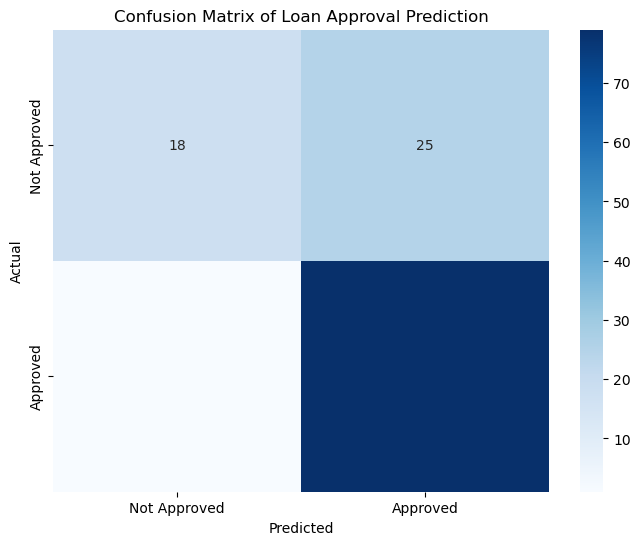

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load datasets
train_df = pd.read_csv('loan_train.csv')
test_df = pd.read_csv('loan_test.csv')

# Data Preprocessing
def preprocess_data(df):
    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))
    df = df.fillna(df.mode().iloc[0])

    # Encode categorical features
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df, label_encoders

train_df, train_encoders = preprocess_data(train_df)
test_df, test_encoders = preprocess_data(test_df)

# Split features and target variable
X = train_df.drop(columns=['Status'])
y = train_df['Status']
X_test = test_df.drop(columns=['Status'], errors='ignore')  # Drop 'Status' if it exists in the test set

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Loan Approval Prediction')
plt.show()

# Save the test set predictions to a CSV file
if 'Id' in test_df.columns:
    submission_df = pd.DataFrame({'Id': test_df['Id'], 'Status': y_test_pred})
else:
    submission_df = pd.DataFrame({'Status': y_test_pred})

submission_df.to_csv('loan_approval.csv', index=False)
